# Bank Credit Risk

The dataset is a bank credit risk, in other words determine the risk of giving credit to someone and if they can pay it back or not and comes from Germany. A bank credit is when an individual or organization gets money from the bank in the form of a loan. But for a bank to know if the individual or organization can pay back the loan, they will look at several factors like credit history, income, property and so on to determine if the loan should be handed or not. The business context of this dataset is to use the features provided to determine a good credit risk or a bad credit risk. This can help a bank know whether to give loans to a new burrower based on the extrapolations derived from this dataset. Analysis and predictive modelling will help achieve this extrapolation. Analytics of the data will be used to find insights about the users and the difference between good credit users and bad credit users. Whilst predictive modelling will be used to classify future customers based on this dataset.

In [2]:
import pandas as pd
import numpy as np

a=["checking account", "Duration", "Credit history","Purpose","Credit amount","Savings account/bonds",
                                                                          "Present employment since","Installment rate",
                                                                         "status and sex","debtors guarantors",
                                                                          "Present residence","Property","Age",
                                                                          "installment plans","Housing"
                                                                         ,"existing credits","job","liable","Telephone",
                                                                         "foreign worker","risk"]

# The above list is used to change the column names as the dataset column names are confusing


In [3]:


data = []
with open("German_credit.txt") as fp:
    lines = fp.read()
    data = lines.split('\n') # Read the txt file

df_data= []
for item in data:
    df_data.append(item.split(' '))  # Append it to list



df = pd.DataFrame(df_data) # Convert list to pandas dataframe

In [5]:

df.columns=a #Changes column names

In [6]:
# Below is data cleaning by changing values in the columns to something more intuitive and correct

df['checking account'] = df['checking account'].map({'A11': 2, 'A12': 3,'A13': 4, 'A14': 1})

df['Credit history'] = df['Credit history'].map({'A30': "None taken", 'A31': "Paid back",'A32': "Paid back till now", 'A33': "Delay",'A34': "Other existing credits"})

df['Purpose'] = df['Purpose'].map({'A40': "Car(new)", 'A41': "Car(used)",'A42': "Furniture/Equipment", 'A43': "Radio/Tv",'A44': "Domestic appliances",
                                  'A45': "Repairs", 'A46': "Education",'A47': "Vacation", 'A48': "Retraining",'A49': "Business",
                                  'A410': "Others"})

df['Savings account/bonds'] = df['Savings account/bonds'].map({'A61': 2, 'A62': 3,'A63': 4, 'A64': 5,
                                                              'A65': 1})

df['Present employment since'] = df['Present employment since'].map({'A71': 1, 'A72': 2,'A73': 3, 'A74': 4,
                                                              'A75': 5})

df['status and sex'] = df['status and sex'].map({'A91': "male/divorced", 'A92': "female/divorced/married",'A93': "male/single", 'A94': "male/married/widowed",
                                                              'A95': "female/single"}) #split sex and status for seperate columns

df['debtors guarantors'] = df['debtors guarantors'].map({'A101': "none", 'A102': "co-applicant",'A103': "guarantor"})

df["Property"] = df["Property"].map({'A121': "real estate", 'A122': "savings agreement/life insurance",'A123': "car or other", 'A124': "unknown/none"})

df['installment plans'] = df['installment plans'].map({'A141': "bank", 'A142': "stores",'A143': "none"})

df['Housing'] = df['Housing'].map({'A151': "rent", 'A152': "own",'A153': "free"})

df['job'] = df['job'].map({'A171': "unemployed/unskilled/non-resident", 'A172': "unskilled-resident",'A173': "skilled employee",
                           'A174': "self-employed"})
df['Telephone'] = df['Telephone'].map({'A191': "none", 'A192': "yes"})

df['foreign worker']=df['foreign worker'].map({'A201': "yes", 'A202': "no"})



In [7]:
df # Dataset after data cleaning

,checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate,status and sex,debtors guarantors,...,Property,Age,installment plans,Housing,existing credits,job,liable,Telephone,foreign worker,risk
0,2,6,Other existing credits,Radio/Tv,1169,1,5,4,male/single,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,3,48,Paid back till now,Radio/Tv,5951,2,3,2,female/divorced/married,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,1,12,Other existing credits,Education,2096,2,4,2,male/single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,1
3,2,42,Paid back till now,Furniture/Equipment,7882,2,4,2,male/single,guarantor,...,savings agreement/life insurance,45,none,free,1,skilled employee,2,none,yes,1
4,2,24,Delay,Car(new),4870,2,3,3,male/single,none,...,unknown/none,53,none,free,2,skilled employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,Paid back till now,Furniture/Equipment,1736,2,4,3,female/divorced/married,none,...,real estate,31,none,own,1,unskilled-resident,1,none,yes,1
996,2,30,Paid back till now,Car(used),3857,2,3,4,male/divorced,none,...,savings agreement/life insurance,40,none,own,1,self-employed,1,yes,yes,1
997,1,12,Paid back till now,Radio/Tv,804,2,5,4,male/single,none,...,car or other,38,none,own,1,skilled employee,1,none,yes,1
998,2,45,Paid back till now,Radio/Tv,1845,2,3,4,male/single,none,...,unknown/none,23,none,free,1,skilled employee,1,yes,yes,2


In [8]:
cat=["checking account","Credit history","Purpose","Savings account/bonds","Present employment since",
     "status and sex","debtors guarantors","Property","installment plans","Housing","job",
    "Telephone","foreign worker","risk"]
numeric=["Duration","Credit amount","Installment rate","Present residence","Age","existing credits","liable"]

df[cat] = df[cat].astype('category')
df[numeric] = df[numeric].astype('int64') #Changing columns to correct datatype

•	Dataset is in finance genre with 1000 users and 21 variables (including target variable).


•	Features comprise of categorical and numerical.


•	Dataset is a multivariate binary classification problem.


•	The dataset uses the given variables provided to determine whether a customer is a good credit risk or bad credit risk.


•	The data mainly comes from Germany, as that is where the dataset was created. The downsides of this dataset are that it is specific to German credit users and should only be used to understand German bank credit users. 


•	This dataset was created in 1994 so the data is old and new trends and patterns will be missed. 


•	The dataset only has 1000 samples, and there is a good argument that 1000 samples is not enough to generalise about credit users.


•	Column names were changed to human readable format using the reference guide.


•	Values of columns changed to human readable format using the reference guide.

•	Manually each attribute has been converted to its appropriate data type.


•	No missing values.



In [9]:
df.describe(include="category") # Describe categorical columns

,checking account,Credit history,Purpose,Savings account/bonds,Present employment since,status and sex,debtors guarantors,Property,installment plans,Housing,job,Telephone,foreign worker,risk
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,1,Paid back till now,Radio/Tv,2,3,male/single,none,car or other,none,own,skilled employee,none,yes,1
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [10]:
df.describe(include="int64") # Describe numeric columns

,Duration,Credit amount,Installment rate,Present residence,Age,existing credits,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Categorical attributes:


•	Apart from the purpose attribute, every attribute has 2-5 unique values.


•	Debtors/guarantors, instalment plans, and Telephone are mostly dominated by none.


•	More than half of the people in the dataset are male and single. Which could mean that the dataset is not diverse. The same can be said for Housing attribute, Savings account bonds attribute, credit history attribute.


### Numerical attributes:


•	The average age in the dataset is 35 but it does include diverse ages from 19 to 75. But the dataset is mostly on people under 42 as 75% of the dataset is on them.


•	The mean duration of months is 20, but we can see that 75% of all people are under 24 months. Which means 24 is the norm for the duration in months.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Distribution and boxplots for the following columns

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(df['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df['Age'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['Credit amount'], ax=ax[0]);
sns.boxplot(df['Duration'], ax=ax[1], color='salmon');
sns.boxplot(df['Age'], ax=ax[2], color='darkviolet')

In [105]:
#sns.pairplot(df)
v=["checking account","Savings account/bonds",
     "status and sex","Credit history"]
b=["debtors guarantors","installment plans","Housing","job",
    "Property"]
j=["foreign worker","Present employment since","Telephone","Purpose","risk"]

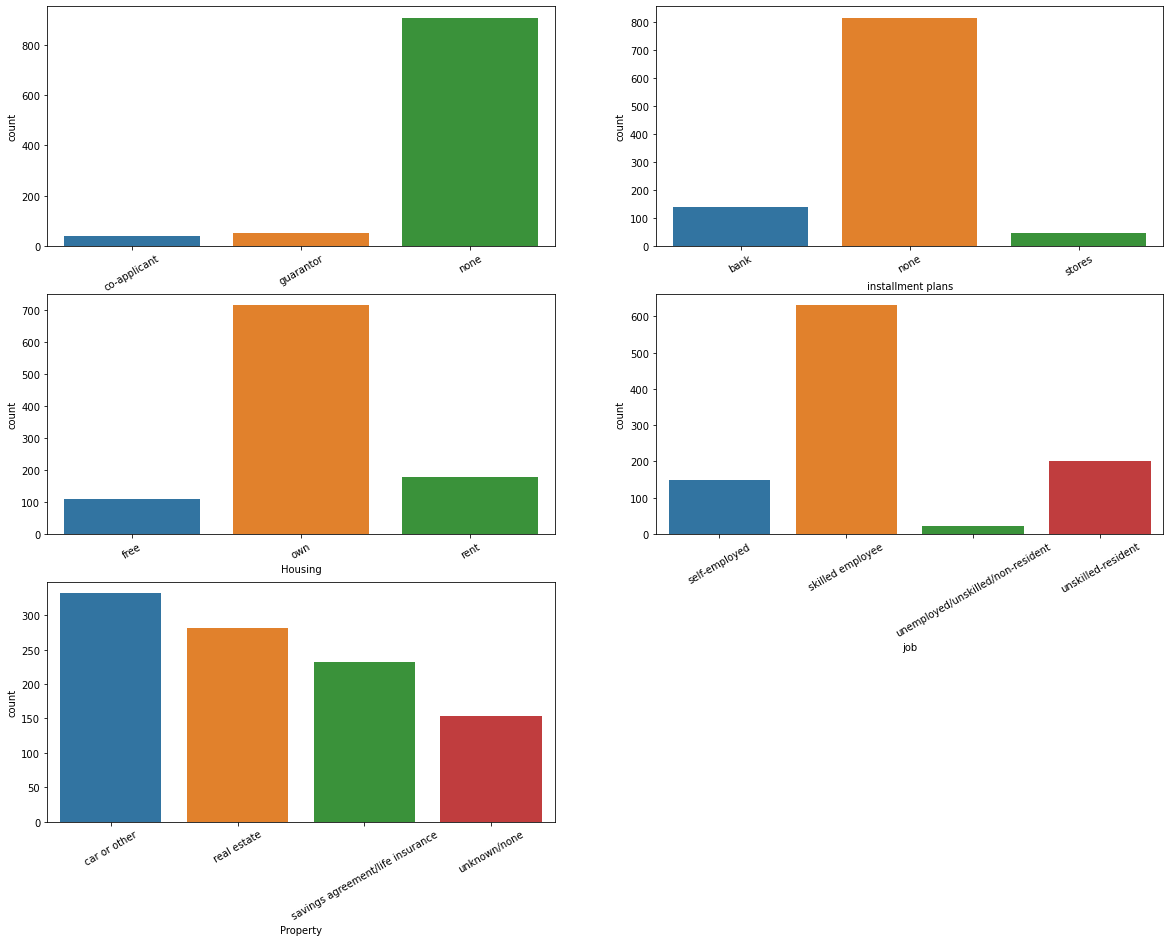

In [106]:
fig = plt.figure(figsize = (20,15))
axes = 320
for c in b:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = c)
    plt.xticks(rotation=30)
    
plt.show()

•	Most of the attributes are dominated by one value.


•	The target attribute risk is imbalanced as 1 is good risk and 2 is bad risk. This means the dataset is skewed towards good customers.


•	In present employment since, people who have been employed for more than 1 year are the main customers.


•	Over 90% of the customers are foreign.


•	Over 70% of customers own their own home.


•	Debtors/ Guarantor and instalment plans attribute are mostly none. This attribute can be removed.


•	Majority of the customers are skilled.


•	Majority of the customers are male, meaning low female customers.


•	Majority of customers do not have a lot of checking account.


•	Most customers savings accounts are between 100-500 DM.


In [19]:
numeric=["Duration","Credit amount","Installment rate","Present residence","Age","existing credits","liable"]



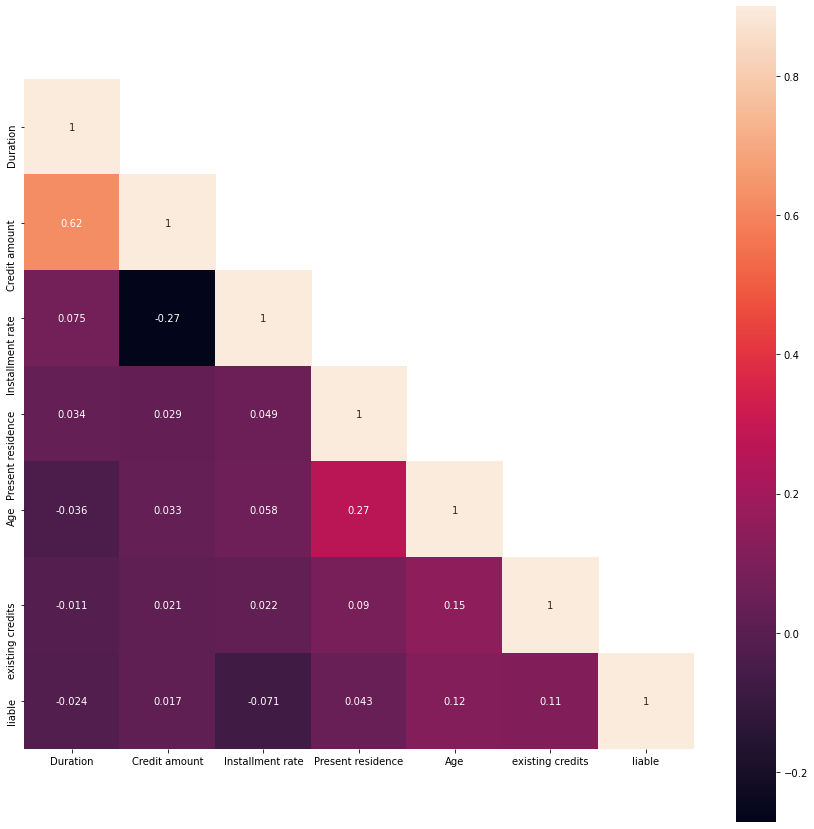

In [109]:
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

• Only duration of months and credit amount have a weak positive correlation. The rest of the attributes do not seem to have a relationship.

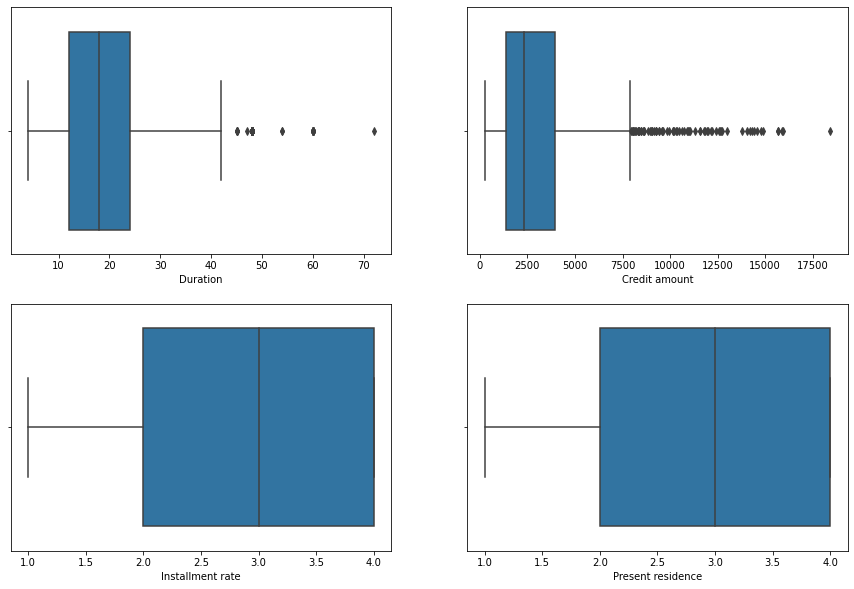

In [110]:

g=["Duration","Credit amount","Installment rate","Present residence"]
f=["Age","existing credits","liable"]
fig = plt.figure(figsize = (15,10))
axes = 220
for num in g:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

In [111]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df=remove_outlier(df,"Duration")
df=remove_outlier(df,"Age")
#ga=remove_outlier(df,"existing credits")
df.shape

(897, 21)

•	The way to remove outliers is to use the lowest quantile range and highest quantile with the interquartile range and 1.5 to find the outliers that are below and above the normal range. 

•	I have only removed outliers from the duration, age and existing credits columns without losing too much data. As they had only a few outliers outside its range.


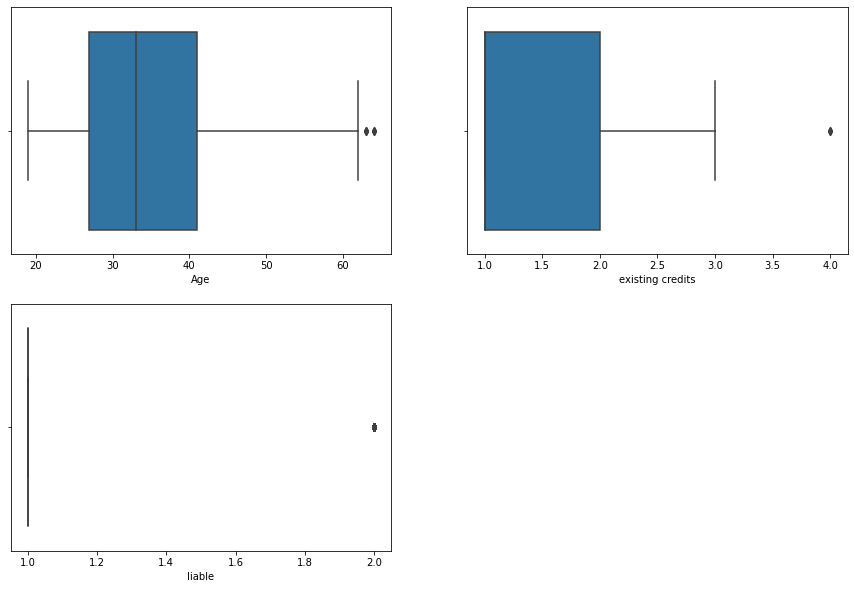

In [112]:
g=["Duration","Credit amount","Installment rate","Present residence"]
f=["Age","existing credits","liable"]
fig = plt.figure(figsize = (15,10))
axes = 220
for num in f:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

A boxplot is a chart that will show the data quartiles. Quartiles divide the data into quarters. From these quartiles we can plot a box and whisker chart that will help us to deduce the distribution, outliers and skewness of the data. The box and whisker plot will show the min score, max score, lower quartile, median and upper quartile of the data. 


•	After around 40 months, the duration attribute is outliers. The months duration is normally distributed but with outliers.

•	The credit amount is positively skewed and after 7500 credit amounts there are outliers. This tells us that most of the customers have little credit amount.

•	Most of instalment rate and present residence values are between 2-4

•	Age is positively skewed with outliers after 61 years of age.

•	One outlier for existing credits which is 4 and most of its values are between 1-2

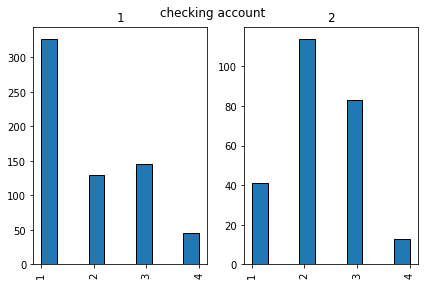

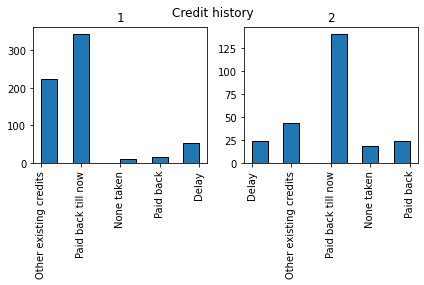

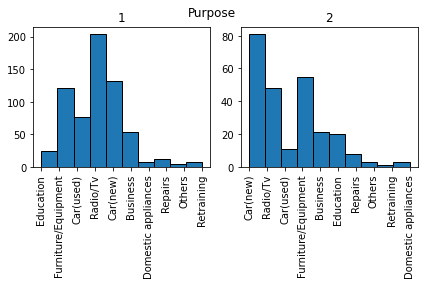

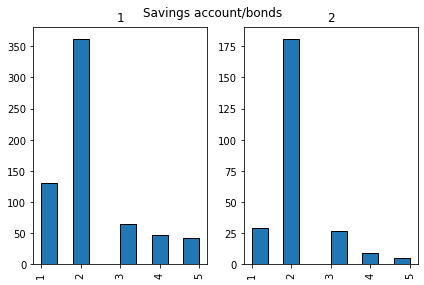

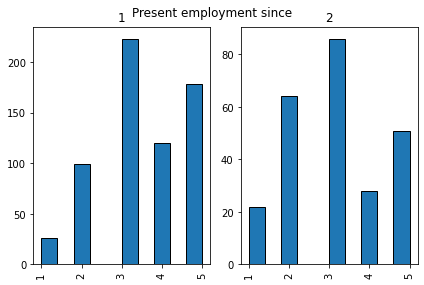

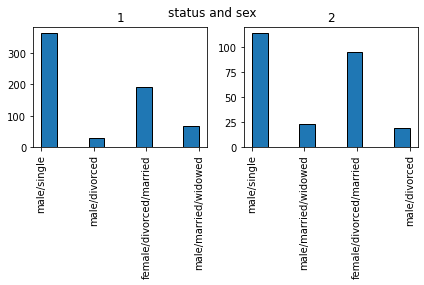

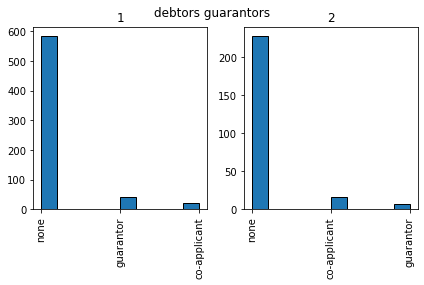

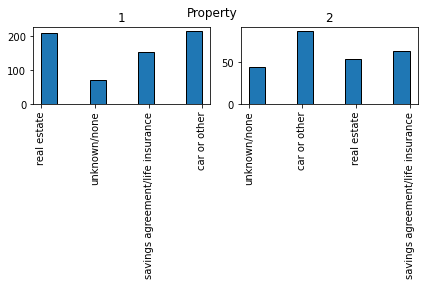

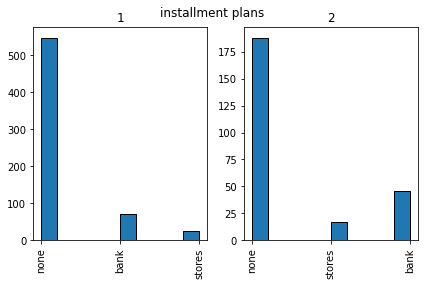

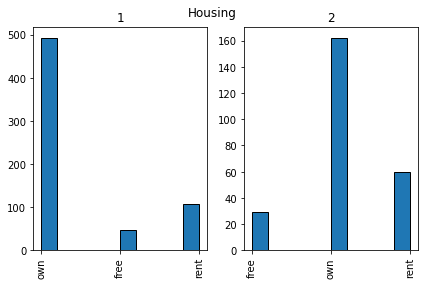

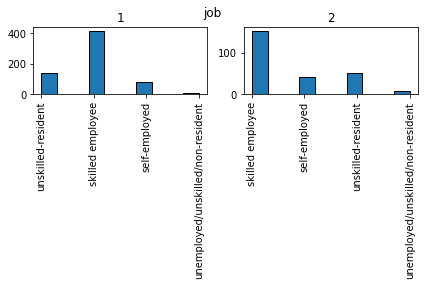

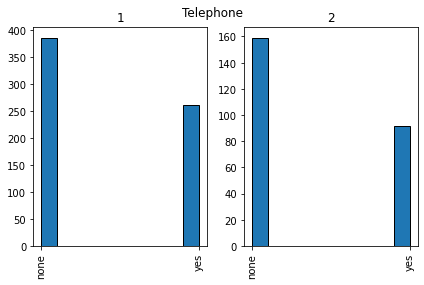

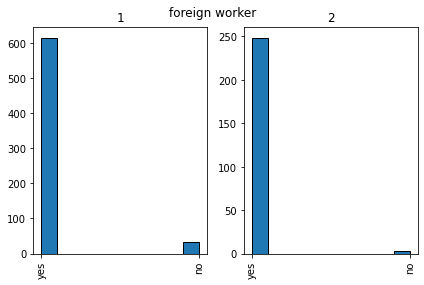

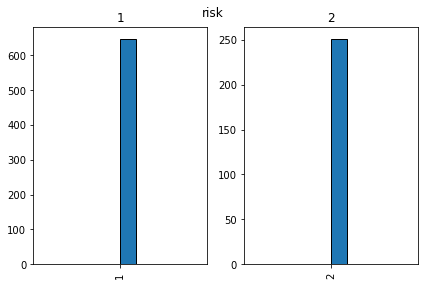

In [113]:


cat=["checking account","Credit history","Purpose","Savings account/bonds","Present employment since",
     "status and sex","debtors guarantors","Property","installment plans","Housing","job",
    "Telephone","foreign worker","risk"]
for x in cat:
    df.hist(by=['risk'],column = x,ec="k")
    
    plt.tight_layout()
    plt.suptitle(x)
    plt.show()

Please note that 1 is good risk and 2 is bad risk.

•Good credit risk customers have a higher less than 0 or DM compared to bad credit risk customers who are between 0-200 DM or 200 DM and over. 

•There is not much difference in the purpose for the credit as good and bad credit users tend to want similar things.

•Bad credit risk customers do not have many other existing credits compared to good risk credit. This can be a good indictor to differentiate the two classes.

•Single males are highest in good credit risk and bad credit risk customers. 


In [15]:
df1 = (df.groupby('risk')
         .describe()
         .unstack()
         .unstack(1)
         .reindex(df.columns[1:], level=0))

df1

count         mean          std    min     25%  \
                  risk                                                   
Duration          1     700.0    19.207143    11.079564    4.0    12.0   
                  2     300.0    24.860000    13.282639    6.0    12.0   
Credit amount     1     700.0  2985.457143  2401.472278  250.0  1375.5   
                  2     300.0  3938.126667  3535.818955  433.0  1352.5   
Installment rate  1     700.0     2.920000     1.128078    1.0     2.0   
                  2     300.0     3.096667     1.088395    1.0     2.0   
Present residence 1     700.0     2.842857     1.108373    1.0     2.0   
                  2     300.0     2.850000     1.094605    1.0     2.0   
Age               1     700.0    36.224286    11.381145   19.0    27.0   
                  2     300.0    33.963333    11.222379   19.0    25.0   
existing credits  1     700.0     1.424286     0.584721    1.0     1.0   
                  2     300.0     1.366667     0.559702    1.0     1.0   
liable            1     700.0     1.155714     0.362844    1.0     1.0   
                  2     300.0     1.153333     0.360911    1.0     1.0   

                           50%      75%      max  
                  risk                            
Duration          1       18.0    24.00     60.0  
                  2       24.0    36.00     72.0  
Credit amount     1     2244.0  3634.75  15857.0  
                  2     2574.5  5141.50  18424.0  
Installment rate  1        3.0     4.00      4.0  
                  2        4.0     4.00      4.0  
Present residence 1        3.0     4.00      4.0  
                  2        3.0     4.00      4.0  
Age               1       34.0    42.25     75.0  
                  2       31.0    40.00     74.0  
existing credits  1        1.0     2.00      4.0  
                  2        1.0     2.00      4.0  
liable            1        1.0     1.00      2.0  
                  2        1.0     1.00      2.0

•	There is a slight difference in month duration between good and bad credit risk customers. 

•	Bad credit customers have a higher credit amount than good credit customers. This can be a strong indicator of the target classes.

•	There is not a big difference in age between the two target variables.

•	Existing credits is slightly lower for bad credit risk customers.


# K-Means Clustering

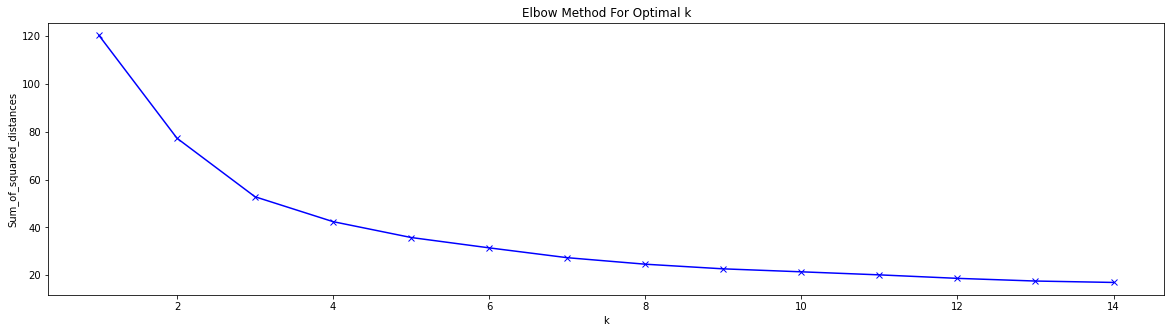

In [120]:

df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = new_df['Credit amount']
df_cluster['Age'] = new_df['Age']
df_cluster['Duration'] = new_df['Duration']

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

•	K-means clustering is an unsupervised algorithm that will cluster similar samples together.

•	Only the numeric features are chosen as the numerical features give the best performance.

•	K is a parameter that will specify how many clusters we want. I have used the elbow method to find the optimal number of clusters based on the sum of squared distance metric for each cluster, and the value that will be chosen is 3 per the elbow method specification. 


K-Means


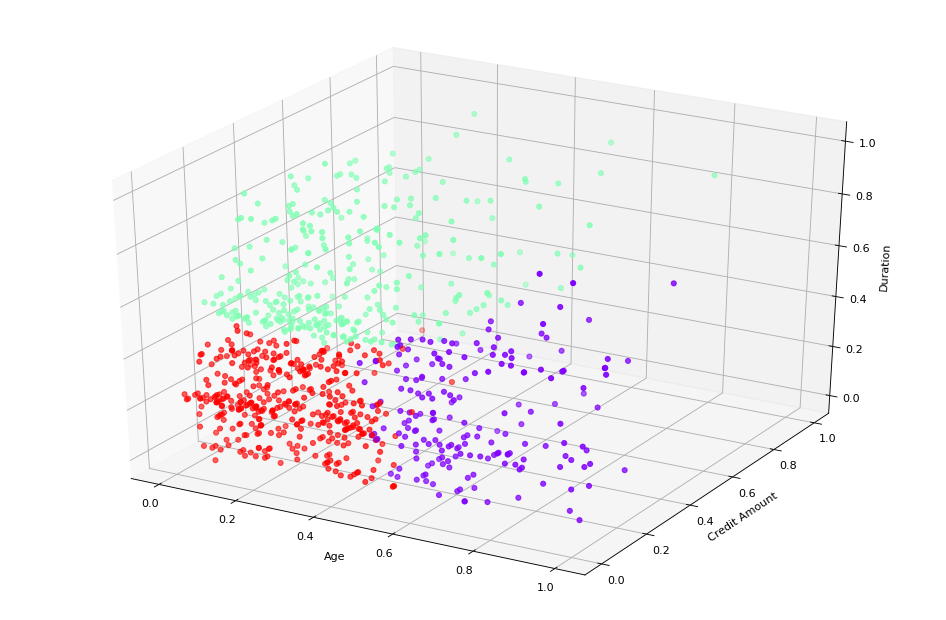

In [121]:
from mpl_toolkits.mplot3d import Axes3D
model = KMeans(n_clusters=3)
model.fit(df_cluster)
kmeans_labels = model.labels_
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels, cmap='rainbow')
xLabel = ax.set_xlabel('Age', linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)


•	I have chosen 3 for the number of clusters.

•	I have visualised the data in 3d format, and we can see that the data has been clustered correctly but there are still a few overlaps but not much.

•	Dimensionality reduction algorithms could also have been used to visualise the data if it were more than 3 dimensions.


In [123]:
df_clustered_kmeans = df_cluster.assign(Cluster=kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean()
grouped_kmeans

,Credit amount,Age,Duration
Cluster,,,
0,0.129499,0.684235,0.320390
1,0.271515,0.283951,0.665432
2,0.104642,0.235124,0.232097


• What each cluster represents is based on the mean of each feature for each cluster.

• Cluster 0 is for medium credit amount, old age customers and have a bit above average duration.

• Cluster 1 is for high credit amount, in mid-twenties and longer duration.

• Cluster 2 is for low credit amount, young age and small duration.


# Decision Tree

In [24]:
from sklearn.preprocessing import LabelEncoder

cat1=["checking account","Credit history","Purpose","Savings account/bonds","Present employment since",
     "status and sex","debtors guarantors","Property","installment plans","Housing","job",
    "Telephone","foreign worker"]
cat2=["status and sex","job","Housing","Purpose"]

In [25]:
from sklearn.preprocessing import OneHotEncoder
new_df=pd.get_dummies(new_df, columns=cat2)
new_df

,Age,Savings account/bonds,checking account,Credit amount,Duration,risk,status and sex_female/divorced/married,status and sex_male/divorced,status and sex_male/married/widowed,status and sex_male/single,...,Purpose_Business,Purpose_Car(new),Purpose_Car(used),Purpose_Domestic appliances,Purpose_Education,Purpose_Furniture/Equipment,Purpose_Others,Purpose_Radio/Tv,Purpose_Repairs,Purpose_Retraining
2,49,2,1,2096,12,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,53,2,2,4870,24,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,35,1,1,9055,36,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,53,4,1,2835,24,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,35,2,3,6948,36,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,30,2,2,3959,36,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
994,50,1,1,2390,12,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
995,31,2,1,1736,12,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
996,40,2,2,3857,30,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


• All the categorical variables have been transformed to one-hot-encoding as ML algorithms need numeric features as input.

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 2 to 997
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Age                                     897 non-null    int64   
 1   Savings account/bonds                   897 non-null    category
 2   checking account                        897 non-null    category
 3   Credit amount                           897 non-null    int64   
 4   Duration                                897 non-null    int64   
 5   risk                                    897 non-null    category
 6   status and sex_female/divorced/married  897 non-null    uint8   
 7   status and sex_male/divorced            897 non-null    uint8   
 8   status and sex_male/married/widowed     897 non-null    uint8   
 9   status and sex_male/single              897 non-null    uint8   
 10  job_self-employed                       897 non-nu

In [27]:
from sklearn.preprocessing import MinMaxScaler
numeric=["Duration","Credit amount","Installment rate","Present residence","Age","existing credits","liable"]
numeric1=["Duration","Credit amount","Age"]
scaler = MinMaxScaler()
new_df[numeric1] = scaler.fit_transform(new_df[numeric1])

In [28]:
new_df.head().head()

,Age,Savings account/bonds,checking account,Credit amount,Duration,risk,status and sex_female/divorced/married,status and sex_male/divorced,status and sex_male/married/widowed,status and sex_male/single,...,Purpose_Business,Purpose_Car(new),Purpose_Car(used),Purpose_Domestic appliances,Purpose_Education,Purpose_Furniture/Equipment,Purpose_Others,Purpose_Radio/Tv,Purpose_Repairs,Purpose_Retraining
2,0.666667,2,1,0.118280,0.222222,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.755556,2,2,0.296021,0.555556,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,0.355556,1,1,0.564170,0.888889,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,0.755556,4,1,0.165631,0.555556,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,0.355556,2,3,0.429166,0.888889,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


• Above I have transformed all the numeric attributes to the Min-Max scaler. The Min-Max scaler will normalize each of the numeric variables into the range between 0 to 1.  Normalisation is used due to the algorithm calculating the distance at the same scale. 

In [ ]:

from sklearn.feature_selection import SelectKBest, chi2, f_regression
X=new_df.drop("risk",axis=1) # Features
y=new_df["risk"] # Target



In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
X_train.shape, X_test.shape

((672, 26), (225, 26))

• Dataset is split into a train and test set with a test size of 25%. Stratifying will make sure that the correct proportion of samples are given to the training and testing test sets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4,5,6],"criterion":["gini","entropy"]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)
grid_search_cv.fit(X_train, y_train)

In [32]:
print("Best Parameters - ",grid_search_cv.best_params_)
print("Best Score - ",grid_search_cv.best_score_)


Best Parameters -  {'criterion': 'gini', 'max_leaf_nodes': 27, 'min_samples_split': 2}
Best Score -  0.7426470588235294


• I have used a decision tree classifier with grid search. Grid search uses cross-validation. Cross-validation will split the training dataset into some partition usually determined by the cv parameter. Then one group will be used for testing and the rest for training. This has the advantage of using the training data as a validation set diversely. In my case the cv is set to 10. Also, Grid search will allow us to find the best parameters of the model.

•The only parameters based on research that give significant improvement in decision trees are max_leaf_nodes, which is finding the best reduction in impurity value. I have chosen a value of 0 to 100 to find the best parameter.

•Min_samples_split is the least amount of the samples that are needed to divide the internal node.  I have chosen 2 to 6 values to find the best parameters. This is another parameter that can improve performance.

•Gini or Entropy are also used for the grid search.


In [94]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred1 = grid_search_cv.predict(X_test)
print("Decision Tree Evaluation: ")
print("\n")
print("Accuracy on test set - ",accuracy_score(y_test,y_pred1))
print("\n")
a=confusion_matrix(y_test, y_pred1)
print("\n")
print(classification_report(y_test, y_pred1))

confusion_matrix = confusion_matrix(y_test, y_pred1)
#y_true = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2])
#y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2])
print("\n")
print(pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True))


# KNN

In [33]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 29


In [34]:
print("Best Score - ",best_model.best_score_)

Best Score -  0.7411106233538193


The second classification algorithm that will be used Is K-Nearest Neighbour (KNN). KNN considers its nearest samples to classify a sample. It will use either Manhattan distance or Euclidean distance to calculate the distance for which class a sample should be classified in. The only parameter that needs to be tuned is N, which is how many neighbours to consider when classifying a new point. 

•	Grid search with cross-validation is used to find best neighbour value, leaf_size(for construction speed and queries) and the distance measure to use indicated by the P variable. These are the three main tuning parameters in KNN.

•	The best values are shown above.

•	I have got a similar accuracy in KNN as the decision tree.


In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = best_model.predict(X_test)
print("KNN Evaluation: ")
print("\n")
print("Accuracy on test set - ",accuracy_score(y_test,y_pred))
print("\n")
a=confusion_matrix(y_test, y_pred)
print("\n")
print(classification_report(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
#y_true = pd.Series([2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2])
#y_pred = pd.Series([0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2])
print("\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


KNN Evaluation: 


Accuracy on test set -  0.7333333333333333




              precision    recall  f1-score   support

           1       0.74      0.96      0.84       162
           2       0.60      0.14      0.23        63

    accuracy                           0.73       225
   macro avg       0.67      0.55      0.53       225
weighted avg       0.70      0.73      0.67       225



Predicted    1   2  All
True                   
1          156   6  162
2           54   9   63
All        210  15  225


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel



clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)



RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [34]:
dic1={}
for name, importance in zip(X.columns, clf.feature_importances_):
    dic1[name]= importance

In [37]:
sorted(dic1.items(), key=lambda x: x[1])

[('Purpose_Retraining', 0.0011137849633556143),
 ('Purpose_Others', 0.0015326619925364836),
 ('Purpose_Domestic appliances', 0.0017627133073241934),
 ('job_unemployed/unskilled/non-resident', 0.0026216589403140513),
 ('foreign worker_no', 0.0033052797703395785),
 ('foreign worker_yes', 0.003351755925352287),
 ('Purpose_Repairs', 0.004679982270284269),
 ('Savings account/bonds_4', 0.0056203353201771875),
 ('Savings account/bonds_5', 0.00564633402519917),
 ('Housing_free', 0.007241620430826209),
 ('debtors guarantors_co-applicant', 0.007260455617780305),
 ('installment plans_stores', 0.007522048269243693),
 ('checking account_4', 0.007895400405612155),
 ('status and sex_male/divorced', 0.008113538671328894),
 ('status and sex_male/married/widowed', 0.008161719872766818),
 ('debtors guarantors_guarantor', 0.008243901866941615),
 ('Purpose_Business', 0.00825156647808329),
 ('Savings account/bonds_3', 0.008651708055248463),
 ('Present employment since_1', 0.008914620119129297),
 ('Purpose_C

Random forests will be used to find the most important features. Random forests are several decision trees used together as an ensemble for classification, regression and finding the feature importance. Above we used a random forest with 10000 decision trees. The feature importance is done by the random forest by finding the probability of the sample that will get to the node, and this will be divided by how ever many samples there are. 

•	The most important features start from the bottom in the dictionary. We can see that credit amount, age and duration are important.

•	For the categorical variables, we can add up the importance of each one hot encoded column to get the total importance for that categorical value. 

•	Given domain knowledge and adding up the feature importance for each categorical variable. The categorical variables that will be chosen are housing, saving accounts, checking account, credit amount and purpose. 

•	The final features that are selected are age, sex, job, housing, savings accounts, checking accounts, credit amount, duration and purpose and the target variable. 
